<a href="https://colab.research.google.com/github/JessePMelo/TelecomX_Regressao_Machine/blob/main/TelecomX_Regressao_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/JessePMelo/TelecomX_Regressao_Machine/refs/heads/main/dados_normalizados.csv')

In [3]:
dados.head(5)

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Aparelho,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
dados = dados.drop('ID_Cliente', axis=1)

In [5]:
dados.head(5)

,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,Backup_Online,Protecao_Aparelho,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
dados.columns

Index(['Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge', 'Possui_Dependentes',
       'Meses_Contrato', 'Telefone_Ativo', 'Multiplas_Linhas', 'Tipo_Internet',
       'Seguranca_Online', 'Backup_Online', 'Protecao_Aparelho',
       'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato',
       'Fatura_Papel', 'Metodo_Pagamento', 'Cobranca_Mensal',
       'Cobranca_Total'],
      dtype='object')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cancelou            7043 non-null   object 
 1   Genero              7267 non-null   object 
 2   Idoso               7267 non-null   int64  
 3   Possui_Conjuge      7267 non-null   object 
 4   Possui_Dependentes  7267 non-null   object 
 5   Meses_Contrato      7267 non-null   int64  
 6   Telefone_Ativo      7267 non-null   object 
 7   Multiplas_Linhas    7267 non-null   object 
 8   Tipo_Internet       7267 non-null   object 
 9   Seguranca_Online    7267 non-null   object 
 10  Backup_Online       7267 non-null   object 
 11  Protecao_Aparelho   7267 non-null   object 
 12  Suporte_Tecnico     7267 non-null   object 
 13  Streaming_TV        7267 non-null   object 
 14  Streaming_Filmes    7267 non-null   object 
 15  Tipo_Contrato       7267 non-null   object 
 16  Fatura

In [8]:
colunas_codifica = ['Cancelou','Genero','Possui_Conjuge','Possui_Dependentes','Telefone_Ativo','Multiplas_Linhas','Tipo_Internet','Seguranca_Online','Backup_Online','Protecao_Aparelho','Suporte_Tecnico','Streaming_TV','Streaming_Filmes',
                       'Tipo_Contrato','Fatura_Papel','Metodo_Pagamento']

df_codificado = pd.get_dummies(dados, columns=colunas_codifica, drop_first=True, dtype=int)

In [9]:
df_codificado.head(2)

,Idoso,Meses_Contrato,Cobranca_Mensal,Cobranca_Total,Cancelou_Yes,Genero_Male,Possui_Conjuge_Yes,Possui_Dependentes_Yes,Telefone_Ativo_Yes,Multiplas_Linhas_No phone service,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Filmes_No internet service,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Fatura_Papel_Yes,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0,9,65.6,593.3,0,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,1
1,0,9,59.9,542.4,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [10]:
df_codificado.columns

Index(['Idoso', 'Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total',
       'Cancelou_Yes', 'Genero_Male', 'Possui_Conjuge_Yes',
       'Possui_Dependentes_Yes', 'Telefone_Ativo_Yes',
       'Multiplas_Linhas_No phone service', 'Multiplas_Linhas_Yes',
       'Tipo_Internet_Fiber optic', 'Tipo_Internet_No',
       'Seguranca_Online_No internet service', 'Seguranca_Online_Yes',
       'Backup_Online_No internet service', 'Backup_Online_Yes',
       'Protecao_Aparelho_No internet service', 'Protecao_Aparelho_Yes',
       'Suporte_Tecnico_No internet service', 'Suporte_Tecnico_Yes',
       'Streaming_TV_No internet service', 'Streaming_TV_Yes',
       'Streaming_Filmes_No internet service', 'Streaming_Filmes_Yes',
       'Tipo_Contrato_One year', 'Tipo_Contrato_Two year', 'Fatura_Papel_Yes',
       'Metodo_Pagamento_Credit card (automatic)',
       'Metodo_Pagamento_Electronic check', 'Metodo_Pagamento_Mailed check'],
      dtype='object')

In [11]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Idoso                                     7267 non-null   int64  
 1   Meses_Contrato                            7267 non-null   int64  
 2   Cobranca_Mensal                           7267 non-null   float64
 3   Cobranca_Total                            7267 non-null   object 
 4   Cancelou_Yes                              7267 non-null   int64  
 5   Genero_Male                               7267 non-null   int64  
 6   Possui_Conjuge_Yes                        7267 non-null   int64  
 7   Possui_Dependentes_Yes                    7267 non-null   int64  
 8   Telefone_Ativo_Yes                        7267 non-null   int64  
 9   Multiplas_Linhas_No phone service         7267 non-null   int64  
 10  Multiplas_Linhas_Yes                

In [12]:
df_codificado['Cobranca_Total'].replace('', '0', inplace=True)
df_codificado['Cobranca_Total'].replace(' ', '0', inplace=True)

/tmp/ipython-input-931200065.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_codificado['Cobranca_Total'].replace('', '0', inplace=True)
/tmp/ipython-input-931200065.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [13]:
df_codificado['Cobranca_Total'] = df_codificado['Cobranca_Total'].astype(float)

In [14]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Idoso                                     7267 non-null   int64  
 1   Meses_Contrato                            7267 non-null   int64  
 2   Cobranca_Mensal                           7267 non-null   float64
 3   Cobranca_Total                            7267 non-null   float64
 4   Cancelou_Yes                              7267 non-null   int64  
 5   Genero_Male                               7267 non-null   int64  
 6   Possui_Conjuge_Yes                        7267 non-null   int64  
 7   Possui_Dependentes_Yes                    7267 non-null   int64  
 8   Telefone_Ativo_Yes                        7267 non-null   int64  
 9   Multiplas_Linhas_No phone service         7267 non-null   int64  
 10  Multiplas_Linhas_Yes                

In [15]:
df_codificado.columns

Index(['Idoso', 'Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total',
       'Cancelou_Yes', 'Genero_Male', 'Possui_Conjuge_Yes',
       'Possui_Dependentes_Yes', 'Telefone_Ativo_Yes',
       'Multiplas_Linhas_No phone service', 'Multiplas_Linhas_Yes',
       'Tipo_Internet_Fiber optic', 'Tipo_Internet_No',
       'Seguranca_Online_No internet service', 'Seguranca_Online_Yes',
       'Backup_Online_No internet service', 'Backup_Online_Yes',
       'Protecao_Aparelho_No internet service', 'Protecao_Aparelho_Yes',
       'Suporte_Tecnico_No internet service', 'Suporte_Tecnico_Yes',
       'Streaming_TV_No internet service', 'Streaming_TV_Yes',
       'Streaming_Filmes_No internet service', 'Streaming_Filmes_Yes',
       'Tipo_Contrato_One year', 'Tipo_Contrato_Two year', 'Fatura_Papel_Yes',
       'Metodo_Pagamento_Credit card (automatic)',
       'Metodo_Pagamento_Electronic check', 'Metodo_Pagamento_Mailed check'],
      dtype='object')

In [16]:
print(dados.columns,'\n' ,df_codificado.columns)

Index(['Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge', 'Possui_Dependentes',
       'Meses_Contrato', 'Telefone_Ativo', 'Multiplas_Linhas', 'Tipo_Internet',
       'Seguranca_Online', 'Backup_Online', 'Protecao_Aparelho',
       'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato',
       'Fatura_Papel', 'Metodo_Pagamento', 'Cobranca_Mensal',
       'Cobranca_Total'],
      dtype='object') 
 Index(['Idoso', 'Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total',
       'Cancelou_Yes', 'Genero_Male', 'Possui_Conjuge_Yes',
       'Possui_Dependentes_Yes', 'Telefone_Ativo_Yes',
       'Multiplas_Linhas_No phone service', 'Multiplas_Linhas_Yes',
       'Tipo_Internet_Fiber optic', 'Tipo_Internet_No',
       'Seguranca_Online_No internet service', 'Seguranca_Online_Yes',
       'Backup_Online_No internet service', 'Backup_Online_Yes',
       'Protecao_Aparelho_No internet service', 'Protecao_Aparelho_Yes',
       'Suporte_Tecnico_No internet service', 'Suporte_Tecnico_Yes'

In [17]:
variavel_alvo = df_codificado['Cancelou_Yes'].reset_index(drop=True)
variavel_alvo = pd.DataFrame(variavel_alvo)

variavel_alvo = variavel_alvo.rename(columns={
    'Cancelou_Yes':                         'Cancelou'})

In [18]:
colunas_apagar = [
    'Cancelou_Yes',
    'Multiplas_Linhas_No phone service',
    'Seguranca_Online_No internet service',
    'Backup_Online_No internet service',
    'Protecao_Aparelho_No internet service',
    'Suporte_Tecnico_No internet service',
    'Streaming_TV_No internet service',
    'Streaming_Filmes_No internet service'
]

df_codificado.drop(columns=colunas_apagar, inplace=True)

In [19]:
df_codificado.columns

Index(['Idoso', 'Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total',
       'Genero_Male', 'Possui_Conjuge_Yes', 'Possui_Dependentes_Yes',
       'Telefone_Ativo_Yes', 'Multiplas_Linhas_Yes',
       'Tipo_Internet_Fiber optic', 'Tipo_Internet_No', 'Seguranca_Online_Yes',
       'Backup_Online_Yes', 'Protecao_Aparelho_Yes', 'Suporte_Tecnico_Yes',
       'Streaming_TV_Yes', 'Streaming_Filmes_Yes', 'Tipo_Contrato_One year',
       'Tipo_Contrato_Two year', 'Fatura_Papel_Yes',
       'Metodo_Pagamento_Credit card (automatic)',
       'Metodo_Pagamento_Electronic check', 'Metodo_Pagamento_Mailed check'],
      dtype='object')

In [20]:
df = df_codificado.rename(columns={
    'Idoso':                         'Idoso',
    'Cobrança_Total':                'Cobrança Total',
    'Meses_Contrato':                'Meses de Contrato',
    'Cobranca_Mensal':               'Cobrança Mensal (R$)',
    'Genero_Male':                   'Sexo',
    'Possui_Conjuge_Yes':            'Tem Cônjuge',
    'Possui_Dependentes_Yes':        'Tem Dependentes',
    'Telefone_Ativo_Yes':            'Linha Telefônica Ativa',
    'Multiplas_Linhas_Yes':          'Tem Múltiplas Linhas',
    'Tipo_Internet_Fiber optic':     'Internet Fibra Óptica',
    'Tipo_Internet_No':              'Sem Internet',
    'Seguranca_Online_Yes':          'Tem Segurança Online',
    'Backup_Online_Yes':             'Tem Backup Online',
    'Protecao_Aparelho_Yes':         'Tem Proteção de Aparelho',
    'Suporte_Tecnico_Yes':           'Tem Suporte Técnico',
    'Streaming_TV_Yes':              'Tem Streaming de TV',
    'Streaming_Filmes_Yes':          'Tem Streaming de Filmes',
    'Tipo_Contrato_One year':        'Contrato de 1 Ano',
    'Tipo_Contrato_Two year':        'Contrato de 2 Anos',
    'Fatura_Papel_Yes':              'Fatura em Papel',
    'Metodo_Pagamento_Credit card (automatic)': 'Pagamento Automático (Cartão)',
    'Metodo_Pagamento_Electronic check':       'Pagamento por Conta Eletrônica',
    'Metodo_Pagamento_Mailed check':           'Pagamento por Conta Postal'
})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Idoso                           7267 non-null   int64  
 1   Meses de Contrato               7267 non-null   int64  
 2   Cobrança Mensal (R$)            7267 non-null   float64
 3   Cobranca_Total                  7267 non-null   float64
 4   Sexo                            7267 non-null   int64  
 5   Tem Cônjuge                     7267 non-null   int64  
 6   Tem Dependentes                 7267 non-null   int64  
 7   Linha Telefônica Ativa          7267 non-null   int64  
 8   Tem Múltiplas Linhas            7267 non-null   int64  
 9   Internet Fibra Óptica           7267 non-null   int64  
 10  Sem Internet                    7267 non-null   int64  
 11  Tem Segurança Online            7267 non-null   int64  
 12  Tem Backup Online               72

In [22]:
print(df.columns, '\n\n' , variavel_alvo.columns,'\n\n')
print(df.info(), '\n\n', variavel_alvo.info())

Index(['Idoso', 'Meses de Contrato', 'Cobrança Mensal (R$)', 'Cobranca_Total',
       'Sexo', 'Tem Cônjuge', 'Tem Dependentes', 'Linha Telefônica Ativa',
       'Tem Múltiplas Linhas', 'Internet Fibra Óptica', 'Sem Internet',
       'Tem Segurança Online', 'Tem Backup Online', 'Tem Proteção de Aparelho',
       'Tem Suporte Técnico', 'Tem Streaming de TV', 'Tem Streaming de Filmes',
       'Contrato de 1 Ano', 'Contrato de 2 Anos', 'Fatura em Papel',
       'Pagamento Automático (Cartão)', 'Pagamento por Conta Eletrônica',
       'Pagamento por Conta Postal'],
      dtype='object') 

 Index(['Cancelou'], dtype='object') 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Idoso                           7267 non-null   int64  
 1   Meses de Contrato               7267 non-null   int64  
 2   Cobrança Mens

variavel_alvo['Cancelou'].unique()

In [24]:
variavel_alvo['Cancelou'].value_counts(normalize=True)

,proportion
Cancelou,
0,0.74281
1,0.25719


In [25]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = variavel_alvo.copy()

X_train, X_test, y_train, y_test = train_test_split (X,
                                                     y,
                                                     test_size=0.3,     #30 % dos dados para teste o restante para treino
                                                     random_state=42,   #Para manter os dados 'fixos' e não gerar valores diferentes a cada execução
                                                     stratify=y         #Manter a proproção dos dados nos testes e treinos.
                                                     )

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test: ", X_test.shape,  "y_test: ",  y_test.shape)

X_train: (5086, 23) y_train: (5086, 1)
X_test:  (2181, 23) y_test:  (2181, 1)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_padronizado = scaler.fit_transform(X_train)
X_test_padronizado = scaler.transform(X_test)

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(
    sampling_strategy = 0.5,
    random_state=42,
    k_neighbors=3
)

X_resample, y_resample = smote.fit_resample(X_train,y_train)

print("X_resample:", X_resample.shape, "y_resample:", y_resample.shape)
print('X_train:', X_train.shape, 'y_train:', y_train.shape)

X_resample: (5667, 23) y_resample: (5667, 1)
X_train: (5086, 23) y_train: (5086, 1)


In [27]:
print(y_train['Cancelou'].value_counts(normalize=True))
print(y_resample['Cancelou'].value_counts(normalize=True))

Cancelou
0    0.742823
1    0.257177
Name: proportion, dtype: float64
Cancelou
0    0.666667
1    0.333333
Name: proportion, dtype: float64


In [29]:
df.corr()

,Idoso,Meses de Contrato,Cobrança Mensal (R$),Cobranca_Total,Sexo,Tem Cônjuge,Tem Dependentes,Linha Telefônica Ativa,Tem Múltiplas Linhas,Internet Fibra Óptica,...,Tem Proteção de Aparelho,Tem Suporte Técnico,Tem Streaming de TV,Tem Streaming de Filmes,Contrato de 1 Ano,Contrato de 2 Anos,Fatura em Papel,Pagamento Automático (Cartão),Pagamento por Conta Eletrônica,Pagamento por Conta Postal
Idoso,1.000000,0.018187,0.220388,0.104076,-0.004288,0.022970,-0.212952,0.010060,0.144567,0.255271,...,0.060358,-0.059376,0.103655,0.119374,-0.046832,-0.114837,0.157734,-0.022698,0.170705,-0.154216
Meses de Contrato,0.018187,1.000000,0.247982,0.825407,0.005765,0.377551,0.159892,0.010205,0.331678,0.020815,...,0.361792,0.322139,0.280738,0.286841,0.205970,0.557675,0.007949,0.235319,-0.207056,-0.234305
Cobrança Mensal (R$),0.220388,0.247982,1.000000,0.652211,-0.013889,0.097122,-0.115832,0.246709,0.490699,0.788453,...,0.483590,0.338429,0.628874,0.628184,0.008758,-0.077935,0.353714,0.031610,0.275550,-0.378635
Cobranca_Total,0.104076,0.825407,0.652211,1.000000,0.000367,0.315409,0.061474,0.113985,0.468405,0.363633,...,0.523836,0.431032,0.516185,0.521490,0.175271,0.351109,0.160023,0.185229,-0.056029,-0.296090
Sexo,-0.004288,0.005765,-0.013889,0.000367,1.000000,-0.005007,0.012038,-0.005073,-0.007805,-0.009572,...,-0.002740,-0.009112,-0.008451,-0.012475,0.007328,-0.005449,-0.011273,0.000700,0.002060,0.015057
Tem Cônjuge,0.022970,0.377551,0.097122,0.315409,-0.005007,1.000000,0.448900,0.018828,0.141187,0.002678,...,0.153209,0.116228,0.124754,0.115729,0.081021,0.246472,-0.011201,0.081613,-0.079629,-0.097648
Tem Dependentes,-0.212952,0.159892,-0.115832,0.061474,0.012038,0.448900,1.000000,-0.003863,-0.027894,-0.168028,...,0.014797,0.062586,-0.015030,-0.040151,0.068755,0.203136,-0.111752,0.061608,-0.151749,0.060222
Linha Telefônica Ativa,0.010060,0.010205,0.246709,0.113985,-0.005073,0.018828,-0.003863,1.000000,0.280379,0.291040,...,-0.073033,-0.097573,-0.025362,-0.034345,-0.001391,0.003888,0.013624,-0.010668,0.004788,-0.002225
Tem Múltiplas Linhas,0.144567,0.331678,0.490699,0.468405,-0.007805,0.141187,-0.027894,0.280379,1.000000,0.367220,...,0.202172,0.098053,0.257405,0.259268,-0.001828,0.106277,0.163225,0.058029,0.085968,-0.226920
Internet Fibra Óptica,0.255271,0.020815,0.788453,0.363633,-0.009572,0.002678,-0.168028,0.291040,0.367220,1.000000,...,0.178009,-0.018282,0.329575,0.325911,-0.073950,-0.212975,0.327790,-0.050565,0.339716,-0.307197


In [30]:
print(
    df.corrwith(variavel_alvo['Cancelou'])
    .sort_values(ascending=False)
)

Internet Fibra Óptica             0.300949
Pagamento por Conta Eletrônica    0.294626
Cobrança Mensal (R$)              0.189866
Fatura em Papel                   0.186666
Idoso                             0.146733
Tem Streaming de TV               0.062430
Tem Streaming de Filmes           0.060586
Tem Múltiplas Linhas              0.039343
Linha Telefônica Ativa            0.012571
Sexo                             -0.009555
Tem Proteção de Aparelho         -0.063452
Tem Backup Online                -0.080163
Pagamento por Conta Postal       -0.090061
Pagamento Automático (Cartão)    -0.131085
Tem Cônjuge                      -0.148546
Tem Suporte Técnico              -0.160440
Tem Dependentes                  -0.161384
Tem Segurança Online             -0.166828
Contrato de 1 Ano                -0.173958
Cobranca_Total                   -0.193345
Sem Internet                     -0.224051
Contrato de 2 Anos               -0.295138
Meses de Contrato                -0.344079
dtype: floa

In [31]:
dados.columns

Index(['Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge', 'Possui_Dependentes',
       'Meses_Contrato', 'Telefone_Ativo', 'Multiplas_Linhas', 'Tipo_Internet',
       'Seguranca_Online', 'Backup_Online', 'Protecao_Aparelho',
       'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato',
       'Fatura_Papel', 'Metodo_Pagamento', 'Cobranca_Mensal',
       'Cobranca_Total'],
      dtype='object')

/tmp/ipython-input-3706510437.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Cobranca_Total'].replace('', '0', inplace=True)
/tmp/ipython-input-3706510437.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

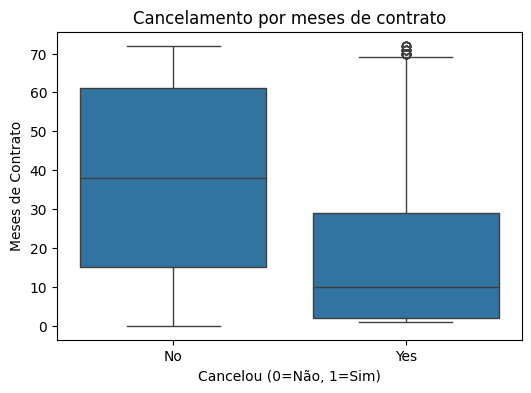

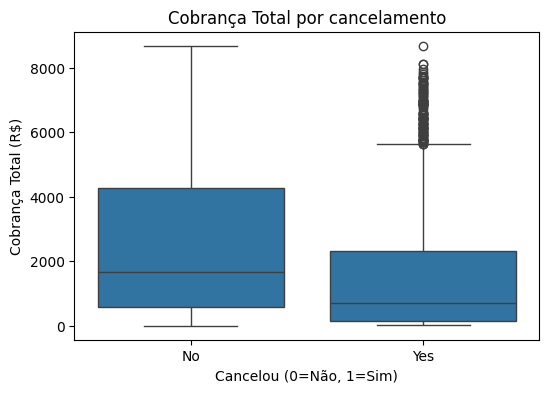

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

dados['Cobranca_Total'].replace('', '0', inplace=True)
dados['Cobranca_Total'].replace(' ', '0', inplace=True)
dados['Cobranca_Total'] = dados['Cobranca_Total'].astype(float)

plt.figure(figsize=(6,4))
sns.boxplot(x='Cancelou',
            y='Meses_Contrato',
            data=dados)
plt.xlabel("Cancelou (0=Não, 1=Sim)")
plt.ylabel("Meses de Contrato")
plt.title("Cancelamento por meses de contrato")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Cancelou',
            y='Cobranca_Total',
            data=dados)
plt.xlabel("Cancelou (0=Não, 1=Sim)")
plt.ylabel("Cobrança Total (R$)")
plt.title("Cobrança Total por cancelamento")
plt.show()
